In [103]:
import os 

import tensorflow as tf
import keras.backend as K
import visualize_filters

from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from keras.preprocessing import image
from visual_backprop import VisualBackprop

%matplotlib inline

from keras.models import load_model 

In [104]:
def show_image(image, grayscale = False, ax=None, title=''):
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    if len(image.shape) == 2 or grayscale == False:
        if len(image.shape) == 3:
            image = np.sum(np.abs(image), axis=2)
            
        vmax = np.percentile(image, 99)
        vmin = np.min(image)

        plt.imshow(image, vmin=vmin, vmax=vmax)
        plt.title(title)
    else:
        image = image + 127.5
        image = image.astype('uint8')
        
        plt.imshow(image)
        plt.title(title)

In [105]:
# Change the model and weights with the ones that are obtained after the classification training

MODEL_PATH = './model/VGG_model.h5'
WEIGHTS_PATH = './weights/VGG_weights.h5'
IMAGE_PATH = './images/example_image.jpg'

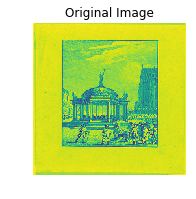

In [106]:
# Loads the image in a format which is liked by a keras model

img = image.load_img(IMAGE_PATH, target_size=(224, 224))
img = np.asarray(img)
show_image(img, ax=plt.subplot('120'), grayscale=False, title='Original Image')

x = np.expand_dims(img, axis=0)

In [ ]:
# Shows the saliency maps for a model which has been trained to recognize the artist

model = load_model(MODEL_PATH)
model.load_weights(WEIGHTS_PATH)

model.compile(loss='mean_squared_error', optimizer='adam')
visual_bprop = VisualBackprop(model)

mask = visual_bprop.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='Saliency Map from a trained model')

plt.show()

In [102]:
# We can visualize the filters of a trained model as Mike suggested
# This is however very slow on the CPU and the code comes from here: https://keras.io/examples/conv_filter_visualization/ 

LAYER_NAME = 'block1_conv2'

#visualize_filters.visualize_layer(model, LAYER_NAME)

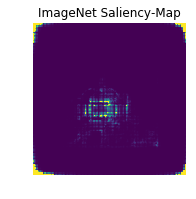

In [90]:
# Shows the saliency map for a simple pre-trained ImageNet model

imagenet_model = VGG19(weights='imagenet')
imagenet_model.compile(loss='mean_squared_error', optimizer='adam')
visual_bprop = VisualBackprop(imagenet_model)

mask = visual_bprop.get_mask(x[0])
show_image(mask, ax=plt.subplot('121'), title='ImageNet Saliency-Map')

plt.show()